# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [139]:
# Pkg.update()
# Pkg.add("DualNumbers")
using Plots
using DualNumbers
pyplot()
include("workbook3functions.jl")

Goldensec (generic function with 1 method)

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

$\textbf1)\:$We Taylor expand f at x and x+2h
$$f(x+h)=f(x)+hf'(x)+\frac{1}{2}h^2f''(x)+O(h^3)$$
$$f(x+2h)=f(x)+2hf'(x)+2h^2f''(x)+O(h^3)$$

Then we take linear combination $a_1f(x)+a_2f(x+h)+a_3f(x+2h)$ and choose $a_1,a_2,a_3$ such that the coefficient of $f'(x)$ is 1 and as many others as possible are zero.
$$ f(x):\qquad a_1+a_2+a_3=0$$
$$ f'(x):\qquad a_2+2a_3=1$$
$$f''(x):\qquad a_2+4a_3=0$$
This gives us $a_1=-\frac{3}{2}\quad a_2=2\quad a_3=-\frac{1}{2}$

Then $$f'(x) = \frac{-3f(x)+4f(x+h)-f(x+2h)}{2h} +O(h^2)$$

$\textbf2)$ $$f'(x)=e^xcos(e^x)$$

In [128]:
Dsinexp(1)

-2.478349732955235

In [127]:
function finitediff3(func,x,h)
    return (4*func(x+h)-3*func(x)-func(x+2*h))/(2*h)
end
function sinexp(x)
    return sin(exp(x))
end
function Dsinexp(x)
    return exp(x)*cos(exp(x))
end

Dsinexp (generic function with 1 method)

In [131]:
approx,error,relerror = zeros(30),zeros(30),zeros(30)
for i=1:30
    approx[i]=finitediff3(sinexp,1,2.0^(-i))
  error[i]=abs(approx[i]-(exp(1)*cos(exp(1))))
    relerror[i]=abs(error[i]/(exp(1)*cos(exp(1))))
end


In [132]:
h=zeros(30)
for i=1:30
    h[i]=2.0^(-float(i))
end


In [133]:
println(indmin(relerror))
println(error[19])
minimum(relerror)


19
8.019451769314401e-11


3.2358031082852225e-11


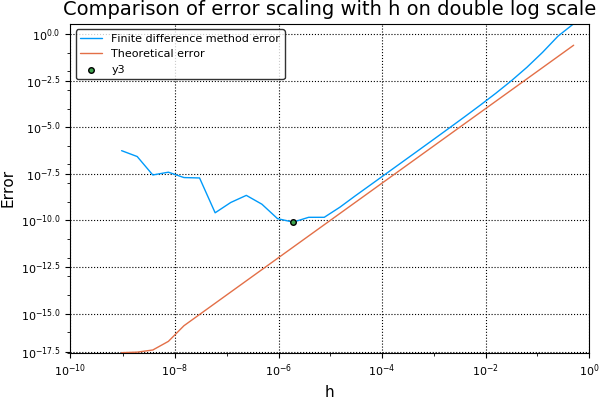

In [138]:

plot(h,error,yscale=:log10,xscale=:log10,label="Finite difference method error")
plot!(h,h.^2,label="Theoretical error")
scatter!([h[19]],[error[19]])
ylabel!("Error");xlabel!("h");title!("Comparison of error scaling with h on double log scale")

In [16]:
x=Dual(1,1)
f(x)=sin(exp(x))
y=f(x)


0.41078129050290885 - 2.478349732955235ɛ

In [19]:
println("f(x) = sin(exp(x))")
println("f(2) = ", realpart(y))
println("f'(2) = ", dualpart(y))
println("error is ",abs(dualpart(y)-exp(1)*cos(exp(1))))

f(x) = sin(exp(x))
f(2) = 0.41078129050290885
f'(2) = -2.478349732955235
error is 0.0


## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

In [120]:
function bracketbisect(func,a,b,epstol)
    error=zeros(100)
    i=1
    while abs(b-a)>epstol
#         z=(b+a)/2
        if func(a)*func((b+a)/2)<0
            a=a
            b=(b+a)/2
            error[i]=abs(((b+a)/2)-log(pi))
            i=i+1
        else
            a=(b+a)/2
            b=b
            error[i]=abs(((b+a)/2)-log(pi))
            i=i+1
        end
        end 
    return (b+a)/2,error[1:i-1],i-1
end


bracketbisect (generic function with 1 method)


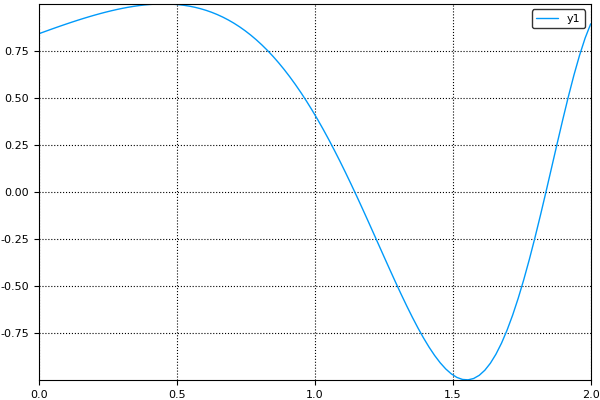

In [26]:
plot(linspace(0,2,100),sinexp.(linspace(0,2,100)))

In [121]:
errbb=bracketbisect(sinexp,0.6,1.6,2^-10.0)[2]

10-element Array{Float64,1}:
 0.20527    
 0.0802701  
 0.0177701  
 0.0134799  
 0.00214511 
 0.00566739 
 0.00176114 
 0.000191989
 0.000784573
 0.000296292


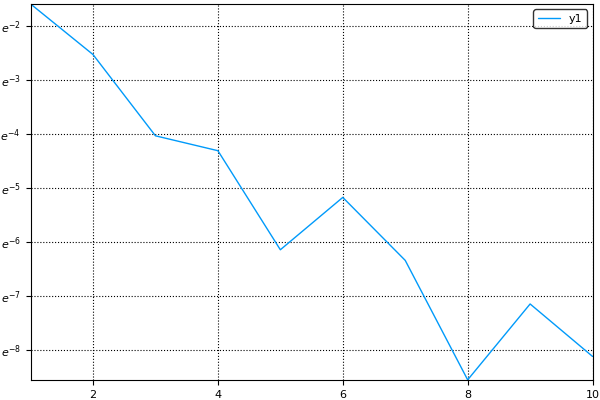

In [122]:
# plot(collect(1:20),errbb[1:20],yscale=:ln)
#plot(collect(1:20),collect(1:20),yscale=:ln)
  plot(collect(1:10),errbb,yscale=:ln)

In [123]:
function NewtonRaph(func,Dfunc,x,eps)
    error=zeros(100)
    i=1
    while abs(func(x))>eps
        x_new=x-(func(x)/Dfunc(x))
        x=x_new
        error[i]=abs(x-log(pi))
        i=i+1
    end
    return x,error[1:i-1],i
end


NewtonRaph (generic function with 1 method)

In [92]:
function Dsinexp(x)
    return exp(x)*cos(exp(x))
end


Dsinexp (generic function with 1 method)

In [124]:
errnr=NewtonRaph(sinexp,Dsinexp,1,2^-13.0)[2];


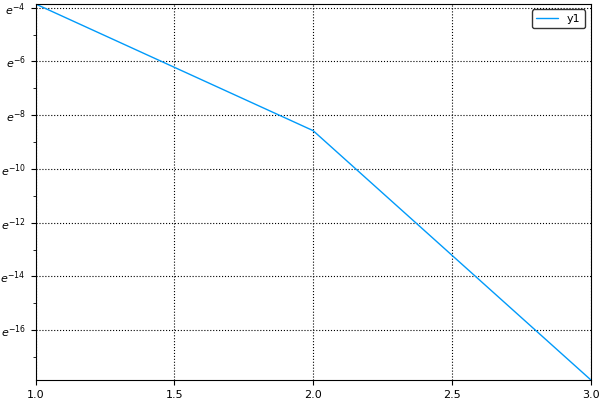

In [126]:
plot(collect(1:3),errnr,yscale=:ln)

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.


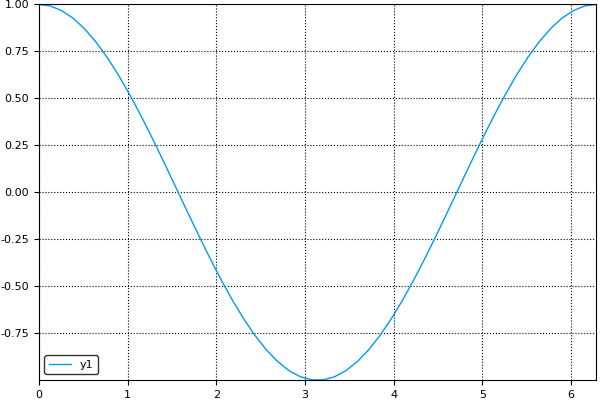

In [51]:
plot(linspace(0,2*pi,50),cos.(linspace(0,2*pi,50)))

In [52]:
log(1.5*pi)

1.5501949939575645

In [79]:
function Goldensec(func,a,b,epstol)
    phi=(1+sqrt(5))/2
    c = b-((b-a)/phi)
    error=zeros(100)
    i=1
    while abs(b-a)>epstol
    x = a+((b-a)/phi)
    c = b-((b-a)/phi)p
        
    if func(x)<func(c)
            error[i]=abs(c-log(1.5*pi))
            i=i+1
            a=c
            c=x
            b=b
            
        else
            error[i]=abs(c-log(1.5*pi))
            i=i+1
            a=a
            c=c
            b=x
            
        end
    end
    return c,error[1:i-1],i-1
end
            

Goldensec (generic function with 1 method)

In [116]:
~,errgs,j=Goldensec(sinexp,1,1.7,1.0e-9);


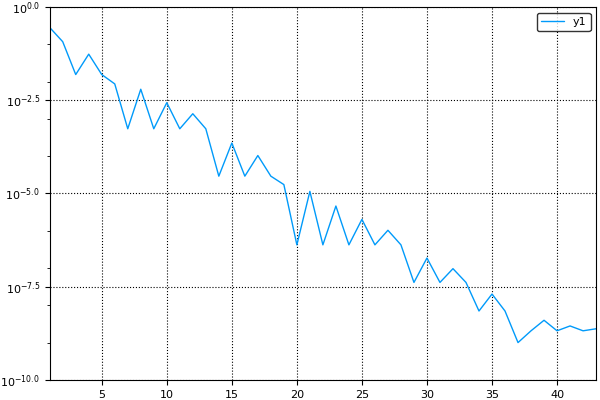

In [117]:
plot(collect(1:j),errgs,yscale=:log10)

In [112]:
errgs[j]

2.233037532661797e-9

In [65]:
Goldensec(sinexp,1,1.7,2^-16.0)[3]

24

In [73]:
j

24

In [74]:
errgs[24]

0.0

In [118]:
errgs[end]

2.338398363832539e-9

In [95]:
sqrt(eps(Float64))*sqrt(2*sinexp(log(1.5*pi))/(Dsinexp(log(1.5*pi))-sinexp(log(1.5*pi))*(1.5*pi)^2))

LoadError: DomainError:
sqrt will only return a complex result if called with a complex argument. Try sqrt(complex(x)).

In [96]:
sinexp(log(1.5*pi))

-1.0

In [99]:
sqrt(2/((1.5*pi)^2))*sqrt(eps())

4.471919517502715e-9

In [100]:
eps

eps (generic function with 12 methods)

In [101]:
eps()

2.220446049250313e-16

In [102]:
1.0e-15

1.0e-15